# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

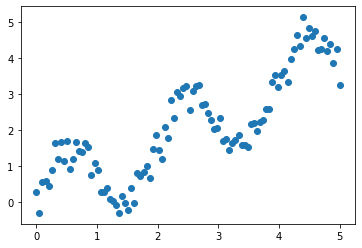

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1) #x轉成2維
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.646355091453895


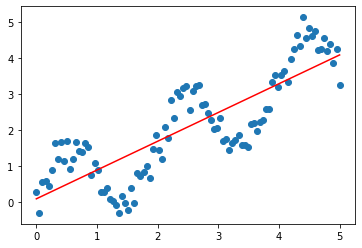

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)
print(x)

(100,)
[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.44444444

In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

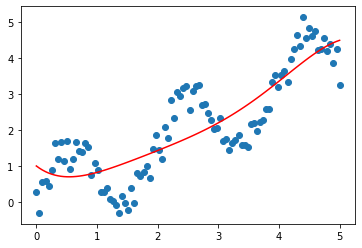

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)  #斜率有5個
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.28722767  1.7101203  -0.74775886  0.15868886 -0.01233287]
interception:  0.9963356411989568


In [17]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b  #矩陣相乘，輸出預測值

array([0.88285626, 0.86112702, 0.84381738, 0.83061887, 0.8212375 ,
       0.81539355, 0.81282117, 0.8132681 , 0.81649541, 0.82227709,
       0.83039986, 0.84066275, 0.85287687, 0.86686504, 0.88246155,
       0.89951178, 0.91787193, 0.93740872, 0.95799903, 0.97952966,
       1.00189695, 1.02500653, 1.04877297, 1.0731195 , 1.09797767,
       1.12328708, 1.14899501, 1.17505619, 1.20143243, 1.22809232,
       1.25501095, 1.28216956, 1.30955527, 1.33716073, 1.36498385,
       1.39302747, 1.42129905, 1.44981037, 1.47857719, 1.507619  ,
       1.53695866, 1.56662209, 1.59663801, 1.62703756, 1.65785407,
       1.68912267, 1.72088003, 1.75316405, 1.78601354, 1.8194679 ,
       1.85356682, 1.88834998, 1.92385673, 1.96012578, 1.99719491,
       2.03510061, 2.07387784, 2.11355965, 2.15417695, 2.19575812,
       2.23832874, 2.2819113 , 2.32652484, 2.3721847 , 2.41890214,
       2.46668411, 2.51553288, 2.56544574, 2.61641472, 2.66842625,
       2.72146088, 2.77549293, 2.83049023, 2.88641374, 2.94321

In [15]:
Y_predict = regr_poly.predict(X_poly)  #輸出預測值

In [16]:
mse = np.sum((Y_predict-y)**2) / len(y)
print(mse)

0.5598647466976101


#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [17]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [18]:
sigma = 0.3

In [19]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])
#引入平均值跟標準差


In [20]:
regr_rbf = LinearRegression()

In [21]:
regr_rbf.fit(X_rbf, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

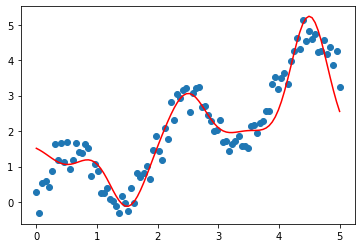

In [22]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [23]:
print('Coefficients: ', regr_rbf.coef_)  #斜率一樣有5個
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.59853074 -1.78976958  1.4032074   0.331076    3.57300773]
interception:  1.6642842416572592


#### Comparison

In [24]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

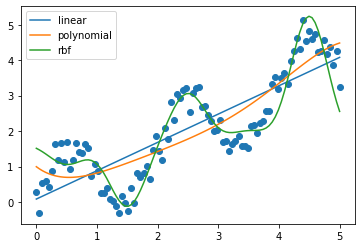

In [28]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [29]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.646355091453895


In [30]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5598647466976101


In [31]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.24462199541191318
